In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def qr_v2(A):
    m, n = A.shape
    Q = np.copy(A)
    R = np.zeros((n, n))
    for j in range(n):
        for i in range(j-1):
            R[i,j] = Q[:, j] @ Q[:, i]
            Q[:, j] -= R[i,j] * Q[:, i]
        R[j,j] = np.linalg.norm(Q[:, j])
        Q[:, j] = Q[:,j]/R[j,j]
    return Q, R

In [74]:
def qr_v3(A):
    m, n = A.shape
    Q = np.copy(A)
    R = np.zeros((n, n))
    for i in range(m):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] /= R[i,i]
        for j in range(i+1, n):
            R[i,j] = Q[:,i] @ Q[:,j]
            Q[:,j] -= R[i,j] * Q[:,i]
    return Q, R

In [75]:
A = np.array([[1,2,1],[0,1,4],[3,1,5]], dtype=float).T
A

array([[1., 0., 3.],
       [2., 1., 1.],
       [1., 4., 5.]])

In [91]:
Q, R = qr_v2(A)
Q

array([[ 0.40824829,  0.        ,  0.31139958],
       [ 0.81649658,  0.24253563, -0.54494926],
       [ 0.40824829,  0.9701425 ,  0.77849894]])

In [77]:
Q, _ = qr_v3(A)
Q # Q no tiene que ser la misma en ambas versiones

array([[ 0.40824829, -0.30151134,  0.86164044],
       [ 0.81649658, -0.30151134, -0.49236596],
       [ 0.40824829,  0.90453403,  0.12309149]])

In [81]:
D = np.eye(100)
for i in range(100):
    D[i,i] = 2**(-i)

B = np.random.rand(100,100)
Q_1, _ = qr_v3(B)
M = Q_1 @ D @ Q_1.T

_, R_1 = qr_v2(M)
_, R_2 = qr_v3(M)

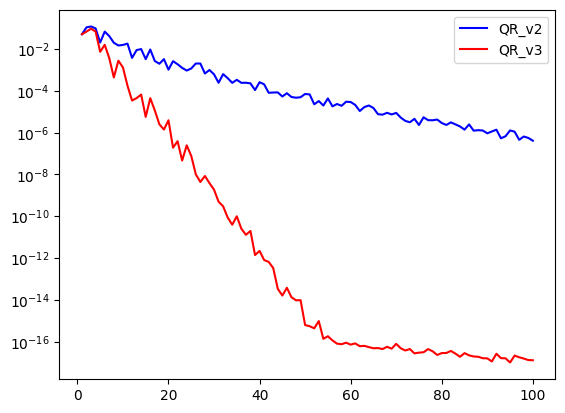

In [86]:
x = np.linspace(1,100,100)
plt.plot(x, np.diag(R_1), label = 'QR_v2', color='blue')
plt.plot(x, np.diag(R_2), label = 'QR_v3', color='red')
plt.legend()
plt.yscale('log')
plt.show()